In [1]:
%%bash

# Download Example Data --------------------------------------------------------

rm -rf ./sample_data/

mkdir -p data

rm -f ./data/*

curl https://raw.githubusercontent.com/rschwess/tutorial_dl_for_genomics/master/data/pwm_seq_200bp_test_set.txt >./data/pwm_seq_200bp_test_set.txt
curl https://raw.githubusercontent.com/rschwess/tutorial_dl_for_genomics/master/data/pwm_seq_200bp_valid_set.txt >./data/pwm_seq_200bp_valid_set.txt
curl https://raw.githubusercontent.com/rschwess/tutorial_dl_for_genomics/master/data/pwm_seq_200bp_train_set.txt >./data/pwm_seq_200bp_train_set.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  198k  100  198k    0     0   436k      0 --:--:-- --:--:-- --:--:--  436k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  198k  100  198k    0     0   340k      0 --:--:-- --:--:-- --:--:--  341k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7533k  100 7533k    0     0  6718k      0  0:00:01  0:00:01 --:--:-- 6720k


In [2]:
%%bash

# Create some directories and download helper scripts for later ----------------
mkdir -p helper visualize

curl https://raw.githubusercontent.com/rschwess/tutorial_dl_for_genomics/master/helper/functions_for_motif_plotting.R >./helper/functions_for_motif_plotting.R
curl https://raw.githubusercontent.com/rschwess/tutorial_dl_for_genomics/master/helper/plot_sequence_kernel_weights_per_dir.R >./helper/plot_sequence_kernel_weights_per_dir.R
curl https://raw.githubusercontent.com/rschwess/tutorial_dl_for_genomics/master/helper/plot_sequence_kernel_icms_per_dir.R >./helper/plot_sequence_kernel_icms_per_dir.R


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18139  100 18139    0     0   102k      0 --:--:-- --:--:-- --:--:--  102k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1512  100  1512    0     0   7677      0 --:--:-- --:--:-- --:--:--  7675
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1510  100  1510    0     0   5510      0 --:--:-- --:--:-- --:--:--  5531


In [3]:
%%bash

# Check Data Layout ###########################

# check lines per set
echo "Numbers:"
wc -l ./data/pwm*

# check data format
echo -ne "\nFormat\n"
head -n 3 ./data/pwm_seq_200bp_test_set.txt

# check class representation
echo -ne "\nClass Representations:\n"

echo -ne "\nTraining:\n"
cut -f 1 ./data/pwm_seq_200bp_train_set.txt | sort | uniq -c
echo -ne "\nTest:\n"
cut -f 1 ./data/pwm_seq_200bp_test_set.txt | sort | uniq -c
echo -ne "\nValidation:\n"
cut -f 1 ./data/pwm_seq_200bp_valid_set.txt | sort | uniq -c



Numbers:
   1000 ./data/pwm_seq_200bp_test_set.txt
  38000 ./data/pwm_seq_200bp_train_set.txt
   1000 ./data/pwm_seq_200bp_valid_set.txt
  40000 total

Format
3	ATGGCTGATAATGACGATTGTACAGATGGTGGATGAGATTGCCTCGTCCCGGCAGCATTACCCCCTGGTGGCAACGGCCACCAGGGGGCAATAAATCTGTGTCTTATCTCCGAGACCAAACAATTCCACAGCCTCTTATACAGCACCGAATGGACCGCCCCCTGGTGGCCAGGTATCGTCGAGGGCTCAATTAAACTCCT
1	GCAGGCATTATGAGGTAATAAACTCAGCGCGTGTTGAGATAAGATTCTAAGCGGCGCGCGCGCGCGACCGCGAGAAGTGGAGATTAAGCGCGCTAATGGTGTGTCCGATAGTCACGTGTCCGCGCGGCGCGCGCCATGTATGTTCTGTTCTGCGCGCCGCGCTTTGCGCGCGCGCTTGGTATATAAAGCTGGGTTTTAAT
1	GGCGCGCCTGGCATTTCTTAGAGAGGCGCGCAATACAACGAGAATCACCTAGAAGCCGTGTCTGTTGCTTATCACCGTTCGCCTAGGCCGCACGGGCACGTGGGTCTCCCGTTCCCTCAATCCTAACAGAAGCGCGCTAAGTCGTCGTTGGCTCTCTTACTAGCAGCGCGCCTGTACTAACCCGGCACTCGGCGGTGGGC

Class Representations:

Training:
   9489 0
   9513 1
   9508 2
   9490 3

Test:
    268 0
    237 1
    243 2
    252 3

Validation:
    243 0
    250 1
    249 2
    258 3


In [18]:
pip install hmmlearn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 3.3 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:
def encode_sequence(seq):
    return [nucleotide_map[nuc] for nuc in seq if nuc in nucleotide_map]

def load_data(filepath):
    data = pd.read_csv(filepath, sep="\t", header=None, names=["label", "sequence"])
    data["encoded"] = data["sequence"].apply(encode_sequence)
    return data

def train_hmm_per_label(train_data, n_states=4):
    label_hmms = {}
    for label in sorted(train_data['label'].unique()):
        label_data = train_data[train_data['label'] == label]
        sequences = label_data['encoded'].tolist()
        lengths = [len(seq) for seq in sequences]
        X = np.concatenate([np.array(seq) for seq in sequences]).reshape(-1, 1)

        model = hmm.CategoricalHMM(n_components=n_states, n_iter=100, tol=1e-5, init_params='ste',algorithm='viterbi', verbose= True)
        model.fit(X, lengths)
        label_hmms[label] = model
    return label_hmms

def predict_labels(hmm_models, data):
    predictions = []
    for seq in data['encoded']:
        seq_array = np.array(seq).reshape(-1, 1)
        scores = {label: model.score(seq_array) for label, model in hmm_models.items()}
        pred_label = max(scores, key=scores.get)
        predictions.append(pred_label)
    return predictions

In [7]:
def evaluate(true_labels, pred_labels, set_name="Test"):
    print(f"\n--- {set_name} Set Evaluation ---")
    print("Accuracy:", accuracy_score(true_labels, pred_labels))
    print("Confusion Matrix:\n", confusion_matrix(true_labels, pred_labels))
    print("Classification Report:\n", classification_report(true_labels, pred_labels))


In [8]:
nucleotide_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

In [9]:
# Load data
train = load_data("/content/data/pwm_seq_200bp_train_set.txt")
test = load_data("/content/data/pwm_seq_200bp_test_set.txt")
valid = load_data("/content/data/pwm_seq_200bp_valid_set.txt")


In [10]:
# Train HMMs
hmm_models = train_hmm_per_label(train, n_states=4)

         1 -2998462.45998857             +nan
         2 -2415016.37756804 +583446.08242053
         3 -2399278.85061797  +15737.52695007
         4 -2390528.38374487   +8750.46687310
         5 -2382193.38415216   +8334.99959271
         6 -2373417.80882286   +8775.57532931
         7 -2365139.96795739   +8277.84086547
         8 -2358243.95528509   +6896.01267230
         9 -2352775.87462465   +5468.08066044
        10 -2348234.49342266   +4541.38120199
        11 -2344100.00608852   +4134.48733414
        12 -2340027.66853796   +4072.33755056
        13 -2335812.63174047   +4215.03679749
        14 -2331321.24734635   +4491.38439412
        15 -2326453.32826416   +4867.91908219
        16 -2321135.82089317   +5317.50737099
        17 -2315338.76208543   +5797.05880774
        18 -2309104.70372626   +6234.05835917
        19 -2302578.56315637   +6526.14056988
        20 -2296017.57399069   +6560.98916569
        21 -2289759.75730406   +6257.81668662
        22 -2284145.63859810   +56

In [11]:
hmm_models[1].startprob_, hmm_models[1].emissionprob_ , hmm_models[1].transmat_

(array([0.71435021, 0.0686874 , 0.08142157, 0.13554081]),
 array([[0.28205831, 0.19685205, 0.23279357, 0.28829608],
        [0.09280187, 0.02254984, 0.87587089, 0.0087774 ],
        [0.04194082, 0.78420683, 0.03256837, 0.14128398],
        [0.31789033, 0.25368333, 0.35048147, 0.07794486]]),
 array([[8.52990127e-01, 3.69479096e-04, 8.07273812e-02, 6.59130132e-02],
        [9.48390959e-04, 5.29674920e-02, 9.27163347e-01, 1.89207702e-02],
        [3.74271036e-01, 5.68690540e-01, 5.39515427e-02, 3.08688207e-03],
        [6.54595981e-01, 3.03981515e-01, 1.45103686e-02, 2.69121351e-02]]))

In [12]:

hmm_models[0].startprob_, hmm_models[0].emissionprob_ , hmm_models[0].transmat_

(array([0.00887812, 0.1256328 , 0.83807356, 0.02741552]),
 array([[6.00056244e-04, 9.98444321e-01, 2.57843822e-04, 6.97779283e-04],
        [3.08621182e-02, 2.31775121e-02, 9.12517526e-01, 3.34428440e-02],
        [2.86534577e-01, 2.54367126e-01, 1.73718961e-01, 2.85379337e-01],
        [2.21847184e-06, 9.78911866e-06, 9.99966470e-01, 2.15224497e-05]]),
 array([[3.35578333e-02, 5.37979869e-02, 2.87540307e-01, 6.25103873e-01],
        [3.86129781e-01, 8.50678247e-02, 4.72086250e-01, 5.67161448e-02],
        [1.21923408e-08, 1.35352386e-01, 8.37236317e-01, 2.74112853e-02],
        [9.70279952e-01, 1.26129339e-03, 1.19154007e-05, 2.84468387e-02]]))

In [13]:
hmm_models[2].startprob_, hmm_models[2].emissionprob_ , hmm_models[2].transmat_

(array([0.05793439, 0.40271975, 0.52500648, 0.01433938]),
 array([[9.90911645e-01, 4.33463044e-03, 1.68078611e-03, 3.07293804e-03],
        [3.01287074e-01, 4.98360109e-01, 9.56654385e-02, 1.04687378e-01],
        [1.54549265e-01, 9.06959427e-02, 4.31677258e-01, 3.23077534e-01],
        [1.83753978e-03, 5.99404647e-04, 8.95931621e-04, 9.96667124e-01]]),
 array([[2.37725999e-02, 2.41671601e-02, 2.04044281e-02, 9.31655812e-01],
        [3.56176848e-02, 5.39389352e-01, 4.20835967e-01, 4.15699656e-03],
        [3.72317236e-02, 3.59085506e-01, 6.03601636e-01, 8.11347583e-05],
        [6.08744503e-01, 1.60217305e-01, 2.06996339e-01, 2.40418522e-02]]))

In [14]:
hmm_models[3].startprob_, hmm_models[3].emissionprob_ , hmm_models[3].transmat_

(array([0.39377562, 0.40177692, 0.19285731, 0.01159015]),
 array([[0.2865016 , 0.3367751 , 0.18030409, 0.19641921],
        [0.23281096, 0.20450403, 0.21799032, 0.34469469],
        [0.13030684, 0.27078141, 0.3452074 , 0.25370434],
        [0.31239475, 0.18139171, 0.32639187, 0.17982167]]),
 array([[1.30451814e-01, 8.12032830e-01, 1.04824680e-03, 5.64671086e-02],
        [4.69920669e-01, 1.59355535e-02, 1.40951882e-01, 3.73191896e-01],
        [6.87128130e-01, 3.64022955e-02, 1.35531921e-01, 1.40937653e-01],
        [2.04999322e-07, 1.30553910e-04, 7.20002160e-01, 2.79867081e-01]]))

In [15]:
# Predict
test_preds = predict_labels(hmm_models, test)
valid_preds = predict_labels(hmm_models, valid)

In [16]:
# Evaluate
evaluate(test['label'], test_preds, "Test")
evaluate(valid['label'], valid_preds, "Validation")


--- Test Set Evaluation ---
Accuracy: 0.887
Confusion Matrix:
 [[251  17   0   0]
 [ 70 158   0   9]
 [  0   0 236   7]
 [  0   5   5 242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       268
           1       0.88      0.67      0.76       237
           2       0.98      0.97      0.98       243
           3       0.94      0.96      0.95       252

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.89      0.88      1000


--- Validation Set Evaluation ---
Accuracy: 0.872
Confusion Matrix:
 [[234   9   0   0]
 [ 95 148   1   6]
 [  0   3 243   3]
 [  0   5   6 247]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.96      0.82       243
           1       0.90      0.59      0.71       250
           2       0.97      0.98      0.97       249
           3

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load sequences and labels
def load_data(filepath):
    sequences, labels = [], []
    with open(filepath, 'r') as f:
        for line in f:
            label, seq = line.strip().split('\t')
            sequences.append(seq)
            labels.append(int(label))
    return sequences, labels

def one_hot_encode(seq, seq_len=200):
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    one_hot = np.zeros((seq_len, 4))
    for i, base in enumerate(seq):
        if base in mapping:
            one_hot[i, mapping[base]] = 1
    return one_hot

train_sequences, train_labels = load_data("/content/data/pwm_seq_200bp_train_set.txt")
test_sequences, test_labels = load_data("/content/data/pwm_seq_200bp_test_set.txt")

X_train = np.array([one_hot_encode(seq) for seq in train_sequences])
X_test = np.array([one_hot_encode(seq) for seq in test_sequences])
y_train = to_categorical(train_labels, num_classes=4)
y_test = to_categorical(test_labels, num_classes=4)

# CNN Model
model = Sequential([
    Conv1D(64, 10, activation='relu', input_shape=(200, 4)),
    MaxPooling1D(pool_size=3),
    Dropout(0.3),
    Conv1D(128, 10, activation='relu'),
    MaxPooling1D(pool_size=3),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate
preds = model.predict(X_test)
y_pred_cnn = np.argmax(preds, axis=1)
y_true_cnn = np.argmax(y_test, axis=1)
print("\nCNN Classification Report:\n")
print(classification_report(y_true_cnn, y_pred_cnn))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 45s 161ms/step - accuracy: 0.5722 - loss: 0.8761 - val_accuracy: 0.8697 - val_loss: 0.3139
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 42s 156ms/step - accuracy: 0.8598 - loss: 0.3310 - val_accuracy: 0.9284 - val_loss: 0.1796
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 42s 156ms/step - accuracy: 0.9254 - loss: 0.1932 - val_accuracy: 0.9697 - val_loss: 0.0912
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 42s 156ms/step - accuracy: 0.9563 - loss: 0.1171 - val_accuracy: 0.9739 - val_loss: 0.0773
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.9685 - loss: 0.0885 - val_accuracy: 0.9747 - val_loss: 0.0712
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 42s 156ms/step - accuracy: 0.9752 - loss: 0.0706 - val_accuracy: 0.9842 - val_loss: 0.0484
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.9793 - loss: 0.0590 - val_accuracy: 0.9847 - val_loss: 0.0432
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - accuracy: 0.9837 - loss: 0

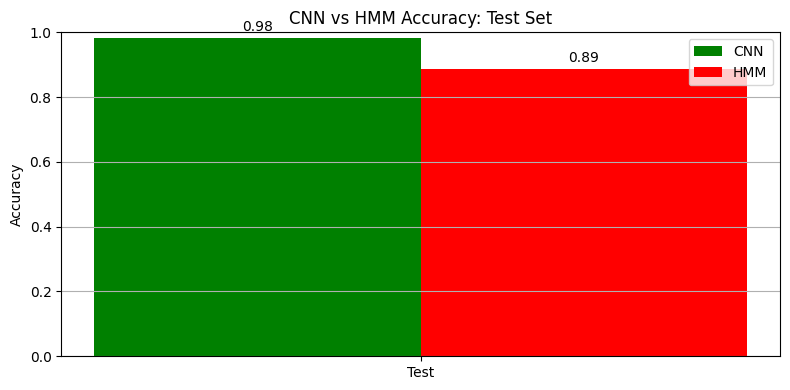

In [20]:
#comparing model performance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# HMM Accuracies (based on test and valid dataframes)
hmm_test_accuracy = accuracy_score(test['label'], test_preds)
hmm_valid_accuracy = accuracy_score(valid['label'], valid_preds)

# CNN Accuracies (from earlier code)
cnn_test_accuracy = accuracy_score(y_true_cnn, y_pred_cnn)

# Plot
labels = ['Test']
x = range(len(labels))
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar([i - width/2 for i in x], [cnn_test_accuracy], width=width, label='CNN', color='green')
plt.bar([i + width/2 for i in x], [hmm_test_accuracy], width=width, label='HMM', color='red')

plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('CNN vs HMM Accuracy: Test Set')
plt.legend()

# Annotate
for i, (c_acc, h_acc) in enumerate(zip([cnn_test_accuracy], [hmm_test_accuracy])):
    plt.text(i - width/2, c_acc + 0.02, f'{c_acc:.2f}', ha='center')
    plt.text(i + width/2, h_acc + 0.02, f'{h_acc:.2f}', ha='center')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# CNN Confusion Matrix
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)
cm_cnn_df = pd.DataFrame(cm_cnn, index=[f"True {i}" for i in range(4)],
                         columns=[f"Pred {i}" for i in range(4)])
print(" CNN Confusion Matrix:")
print(cm_cnn_df)

# HMM Confusion Matrix
cm_hmm = confusion_matrix(test['label'], test_preds)
cm_hmm_df = pd.DataFrame(cm_hmm, index=[f"True {i}" for i in range(4)],
                         columns=[f"Pred {i}" for i in range(4)])
print("\n HMM Confusion Matrix:")
print(cm_hmm_df)


 CNN Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3
True 0     260       8       0       0
True 1       2     234       0       1
True 2       0       0     243       0
True 3       0       1       4     247

 HMM Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3
True 0     251      17       0       0
True 1      70     158       0       9
True 2       0       0     236       7
True 3       0       5       5     242
